In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

class NeuralNet(nn.Module):
    def _init_(self, input_size=784, hidden_size=128, num_classes=10):
        super(NeuralNet, self)._init_()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform)

In [ ]:
print(train_dataset.data.size())
print(test_dataset.data.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


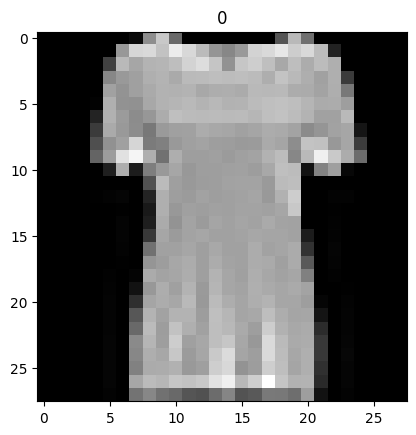

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset.data[10], cmap="gray")
plt.title('%i' % train_dataset.targets[10])
plt.show()

In [ ]:
from torch.utils.data import DataLoader
loaders = {
    'train': torch.utils.data.DataLoader(train_dataset,
                                          batch_size = 100,
                                          shuffle = 'True',
                                          num_workers = 1),
    'test': torch.utils.data.DataLoader(test_dataset,
                                          batch_size = 100,
                                          shuffle = 'True',
                                          num_workers = 1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7a6a7b4c22f0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7a6a7b4c2110>}

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        #print(x.shape) # getting shape of linear layer
        output = self.out(x)
        return output, x    # return x for visualization


In [ ]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [ ]:
lambda_value = 1e-6
optimizer = optim.Adam(cnn.parameters(), lr = 1e-4)
epochs = 5
losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(loaders['train']):
        optimizer.zero_grad()
        outputs, _ = cnn(images)
        loss = loss_func(outputs, labels)

        # L1 penalty
        l1_reg = 0.0
        for param in cnn.parameters():
            l1_reg += torch.norm(param, p=1)

        loss += lambda_value * l1_reg

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    losses.append(running_loss)

print('Finished Training')


[1,   100] loss: 1.777
[1,   200] loss: 0.944
[1,   300] loss: 0.748
[1,   400] loss: 0.675
[1,   500] loss: 0.617
[1,   600] loss: 0.607
[2,   100] loss: 0.573
[2,   200] loss: 0.544
[2,   300] loss: 0.538
[2,   400] loss: 0.526
[2,   500] loss: 0.512
[2,   600] loss: 0.509
[3,   100] loss: 0.479
[3,   200] loss: 0.473
[3,   300] loss: 0.464
[3,   400] loss: 0.470
[3,   500] loss: 0.465
[3,   600] loss: 0.454
[4,   100] loss: 0.445
[4,   200] loss: 0.435
[4,   300] loss: 0.425
[4,   400] loss: 0.426
[4,   500] loss: 0.431
[4,   600] loss: 0.425
[5,   100] loss: 0.420
[5,   200] loss: 0.416
[5,   300] loss: 0.410
[5,   400] loss: 0.414
[5,   500] loss: 0.407
[5,   600] loss: 0.386
Finished Training


In [ ]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
    print('Test Accuracy of the model on the 10000 test images: %.2f'% accuracy)

    pass
test()

Test Accuracy of the model on the 10000 test images: 0.84


In [ ]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [ ]:
actual_number = lbls[:10].numpy()
actual_number

array([3, 8, 1, 0, 4, 8, 6, 4, 6, 0])

In [ ]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')

Prediction number: [3 8 1 0 4 8 6 4 0 0]
Actual number: [3 8 1 0 4 8 6 4 6 0]
